##Bitcoin Price prediction using Facebook Prophet

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing Necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
pip install prophet

In [3]:
import pandas as pd
from prophet import Prophet
import plotly.express as px


ModuleNotFoundError: No module named 'prophet'

In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default= 'colab'

## Importing the Dataset & Exploring it

In [ ]:
from google.colab import files
files.upload()

Saving bitcoin_data.csv to bitcoin_data.csv


{'bitcoin_data.csv': b'Date,Close\r\n1/1/2016,435.66\r\n1/2/2016,435.4\r\n1/3/2016,431.91\r\n1/4/2016,433.85\r\n1/5/2016,433.34\r\n1/6/2016,430.87\r\n1/7/2016,459.07\r\n1/8/2016,454.44\r\n1/9/2016,450.38\r\n1/10/2016,449.99\r\n1/11/2016,449.19\r\n1/12/2016,434.01\r\n1/13/2016,432.77\r\n1/14/2016,430.03\r\n1/15/2016,357.53\r\n1/16/2016,388.7\r\n1/17/2016,378.46\r\n1/18/2016,384.89\r\n1/19/2016,375.27\r\n1/20/2016,418.54\r\n1/21/2016,409.38\r\n1/22/2016,382.9\r\n1/23/2016,387.5\r\n1/24/2016,403.05\r\n1/25/2016,391.4\r\n1/26/2016,391.54\r\n1/27/2016,394.79\r\n1/28/2016,379.61\r\n1/29/2016,378.68\r\n1/30/2016,378.46\r\n1/31/2016,367.95\r\n2/1/2016,371.33\r\n2/2/2016,372.93\r\n2/3/2016,368.87\r\n2/4/2016,387.99\r\n2/5/2016,384.5\r\n2/6/2016,375.44\r\n2/7/2016,377.49\r\n2/8/2016,371.14\r\n2/9/2016,372.68\r\n2/10/2016,378.44\r\n2/11/2016,378.23\r\n2/12/2016,382.05\r\n2/13/2016,391\r\n2/14/2016,406.59\r\n2/15/2016,398.95\r\n2/16/2016,407.42\r\n2/17/2016,415.2\r\n2/18/2016,421.19\r\n2/19/2016,4

In [ ]:
#read_csv function from pandas
df= pd.read_csv("bitcoin_data.csv")

In [ ]:
df

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1705 non-null   object 
 1   Close   1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [ ]:
df.describe()

,Close
count,1705.000000
mean,5455.314499
std,3962.263892
min,357.530000
25%,1062.150000
50%,6005.050000
75%,8624.280000
max,19650.010000


# Data Visualization

In [ ]:
# Area graph (Date Vs Price)

In [ ]:
px.area(df,x='Date',y='Close')

In [ ]:
# Violin plot

In [ ]:
px.violin(df, y="Close")

# Creating Facebook Prophet Model

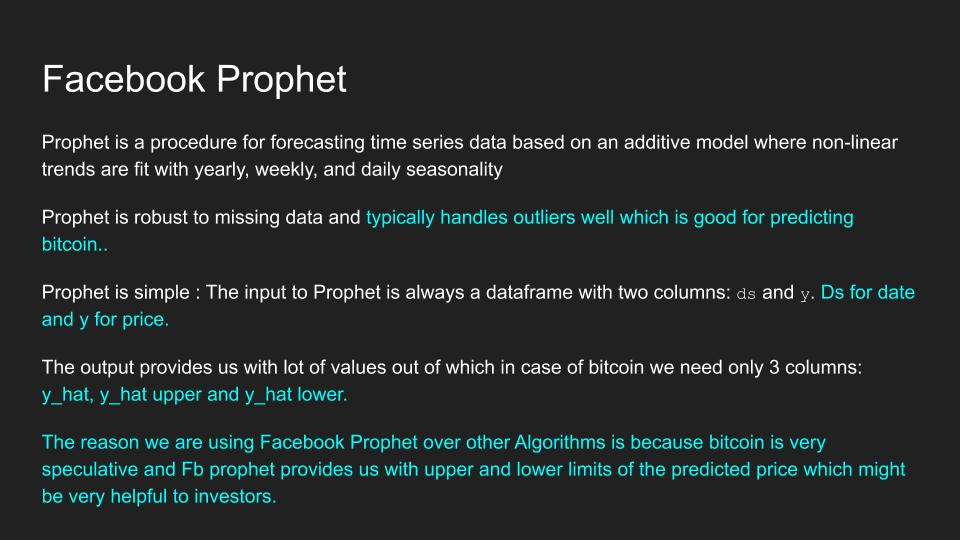

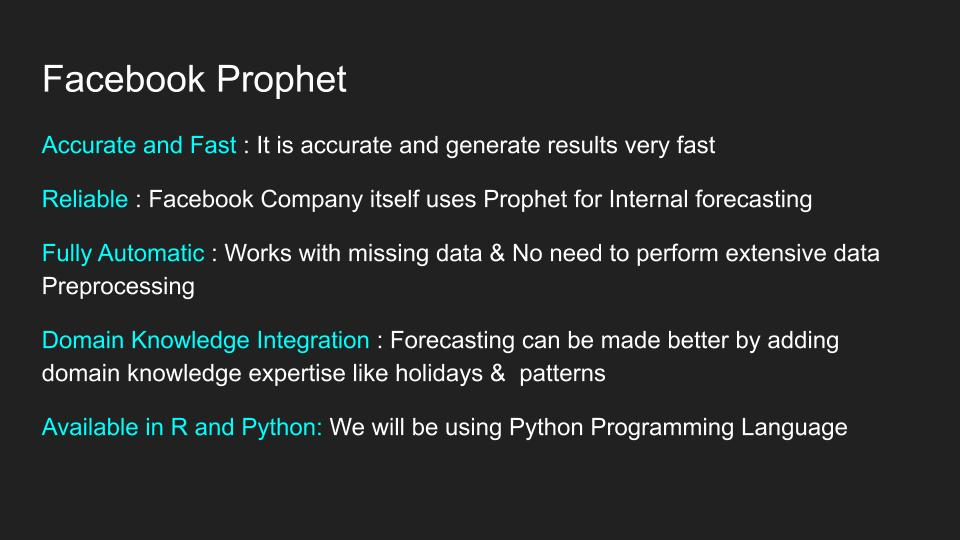

## Data Preperation

In [ ]:
df

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [ ]:
prophet_df = df.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


## Modelling

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc1jp3_j/5ivpipc_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc1jp3_j/o0qq3rkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29253', 'data', 'file=/tmp/tmpbc1jp3_j/5ivpipc_.json', 'init=/tmp/tmpbc1jp3_j/o0qq3rkp.json', 'output', 'file=/tmp/tmpbc1jp3_j/prophet_model_f33m29z/prophet_model-20230724054135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast= m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,854.912985,-272.722104,2933.971617,854.912985,854.912985,471.174843,471.174843,471.174843,-3.405562,-3.405562,-3.405562,474.580405,474.580405,474.580405,0.0,0.0,0.0,1326.087828
1,2016-01-02,852.631497,-241.549917,2853.963178,852.631497,852.631497,449.216611,449.216611,449.216611,15.373406,15.373406,15.373406,433.843206,433.843206,433.843206,0.0,0.0,0.0,1301.848108
2,2016-01-03,850.350008,-284.194442,2635.851120,850.350008,850.350008,386.706015,386.706015,386.706015,-8.603254,-8.603254,-8.603254,395.309269,395.309269,395.309269,0.0,0.0,0.0,1237.056023
3,2016-01-04,848.068520,-271.358608,2734.368561,848.068520,848.068520,378.165719,378.165719,378.165719,18.996336,18.996336,18.996336,359.169383,359.169383,359.169383,0.0,0.0,0.0,1226.234239
4,2016-01-05,845.787031,-389.340470,2668.366219,845.787031,845.787031,320.830002,320.830002,320.830002,-4.652828,-4.652828,-4.652828,325.482830,325.482830,325.482830,0.0,0.0,0.0,1166.617034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2020-09-26,9092.734958,7507.341093,10439.678456,9049.161087,9147.805908,-146.224094,-146.224094,-146.224094,15.373406,15.373406,15.373406,-161.597499,-161.597499,-161.597499,0.0,0.0,0.0,8946.510864
1731,2020-09-27,9093.308971,7251.725086,10395.053466,9049.977113,9155.073101,-205.123976,-205.123976,-205.123976,-8.603254,-8.603254,-8.603254,-196.520722,-196.520722,-196.520722,0.0,0.0,0.0,8888.184994
1732,2020-09-28,9093.882984,7312.855762,10285.629875,9047.483558,9164.044004,-212.254758,-212.254758,-212.254758,18.996336,18.996336,18.996336,-231.251095,-231.251095,-231.251095,0.0,0.0,0.0,8881.628225
1733,2020-09-29,9094.456997,7128.081216,10303.196692,9042.509567,9175.058976,-270.122945,-270.122945,-270.122945,-4.652828,-4.652828,-4.652828,-265.470117,-265.470117,-265.470117,0.0,0.0,0.0,8824.334051


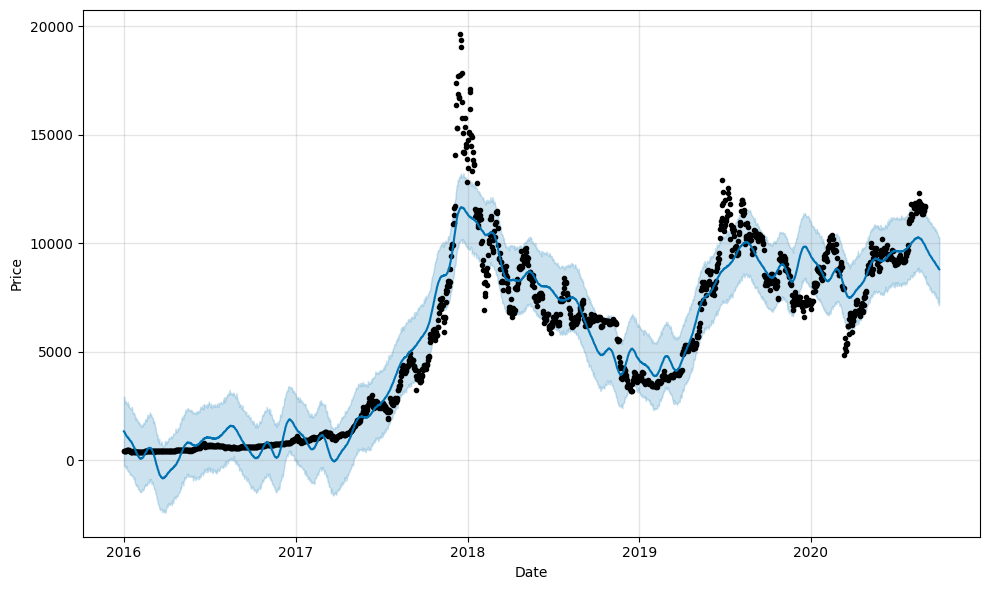

In [ ]:
figure =m.plot(forecast,xlabel= 'Date',ylabel='Price')

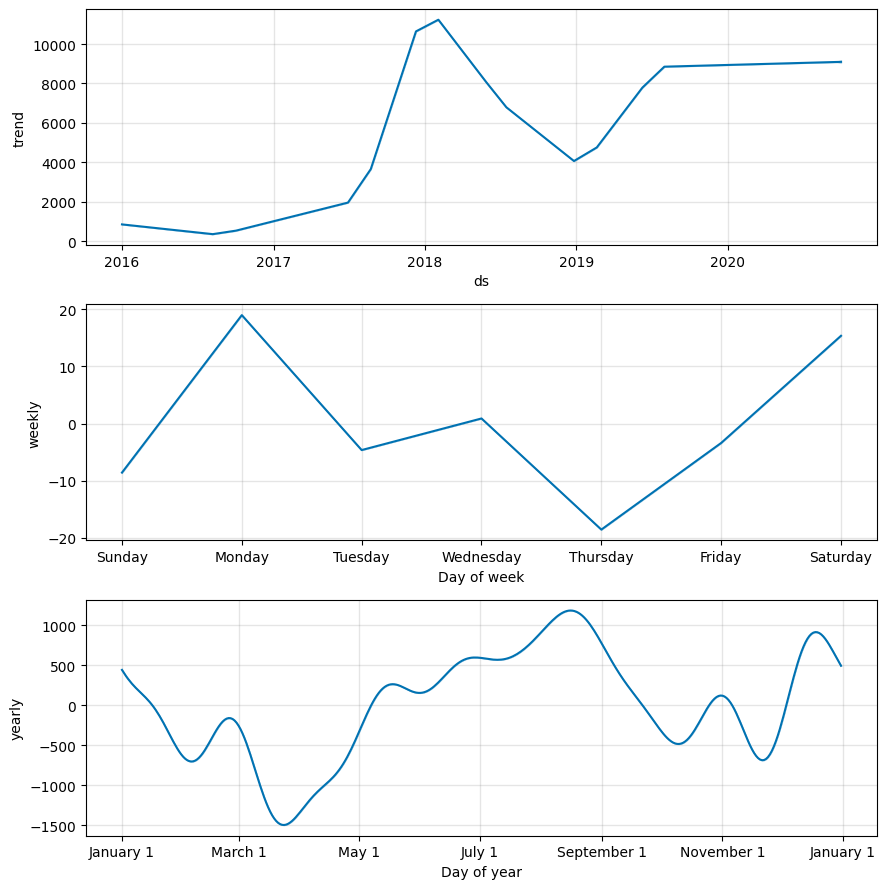

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
forecast.to_csv("Forecast.csv")
from google.colab import files
files.download("Forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>